Cargar csv

In [2]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'

df = pd.read_csv(url)

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Calculo porcentaje valores nulos 

In [5]:
# Calcular el porcentaje de valores nulos en la columna 'Price'
porcentaje_nulos = df['Price'].isnull().mean() * 100

# Mostrar el porcentaje de valores nulos
print(f"Porcentaje de valores nulos en la columna 'Price': {porcentaje_nulos:.2f}%")


Porcentaje de valores nulos en la columna 'Price': 21.83%


Eliminar valores nulos de la columna 'Price'

In [4]:
# Eliminar las filas donde la columna 'Price' tenga valores nulos
df_clean = df.dropna(subset=['Price'])

# Convertir la columna 'Price' a entero
df_clean['Price'] = df_clean['Price'].astype(int)

# Mostrar las primeras filas del DataFrame limpio
print(df_clean.head())


       Suburb           Address  Rooms Type    Price Method SellerG  \
1  Abbotsford      85 Turner St      2    h  1480000      S  Biggin   
2  Abbotsford   25 Bloomburg St      2    h  1035000      S  Biggin   
4  Abbotsford      5 Charles St      3    h  1465000     SP  Biggin   
5  Abbotsford  40 Federation La      3    h   850000     PI  Biggin   
6  Abbotsford       55a Park St      4    h  1600000     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
5  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
6  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
1        Na

C:\Users\Casa\AppData\Local\Temp\ipykernel_28208\3169009442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price'] = df_clean['Price'].astype(int)


2 what is the most common type of property, and what percentage of the properties of does it represent?(h -house; u- unit; t townhouse)

In [6]:
# Encontrar el tipo de propiedad más común
tipo_comun = df['Type'].mode()[0]

# Calcular el porcentaje de ese tipo de propiedad
porcentaje_comun = (df['Type'].value_counts(normalize=True) * 100).loc[tipo_comun]

# Mostrar el tipo de propiedad más común y su porcentaje
print(f"El tipo de propiedad más común es: {tipo_comun}")
print(f"Representa el {porcentaje_comun:.2f}% de las propiedades.")


El tipo de propiedad más común es: h
Representa el 68.80% de las propiedades.


3. Create a graph to show the frequency of each property type in the descendig order. Which graph technique is the most suitable and straightforrward approach for this task

C:\Users\Casa\AppData\Local\Temp\ipykernel_28208\1808303569.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_frecuencia.index, y=tipo_frecuencia.values, palette='Blues_d')


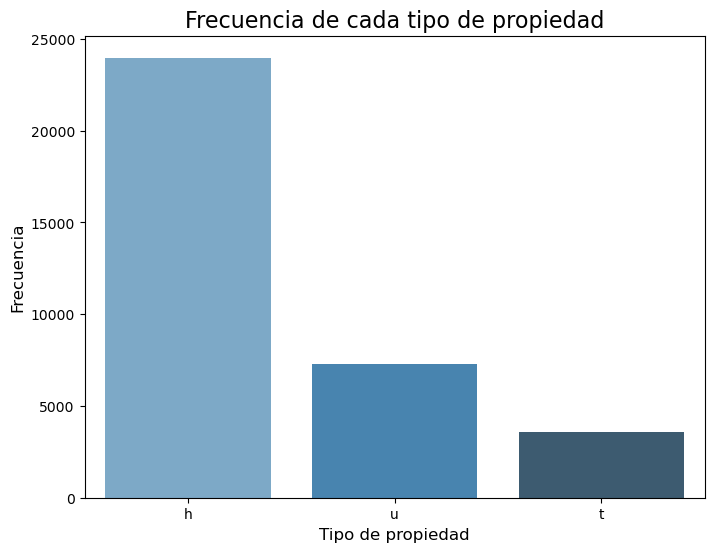

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la frecuencia de cada tipo de propiedad
tipo_frecuencia = df['Type'].value_counts()

# Crear un gráfico de barras en orden descendente
plt.figure(figsize=(8, 6))
sns.barplot(x=tipo_frecuencia.index, y=tipo_frecuencia.values, palette='Blues_d')

# Añadir títulos y etiquetas
plt.title('Frecuencia de cada tipo de propiedad', fontsize=16)
plt.xlabel('Tipo de propiedad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()


4.how does the number of romms impact the median property price? represnt this relationship using a bar chart

C:\Users\Casa\AppData\Local\Temp\ipykernel_28208\105096952.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_medio_habitaciones.index, y=precio_medio_habitaciones.values, palette='Blues_d')


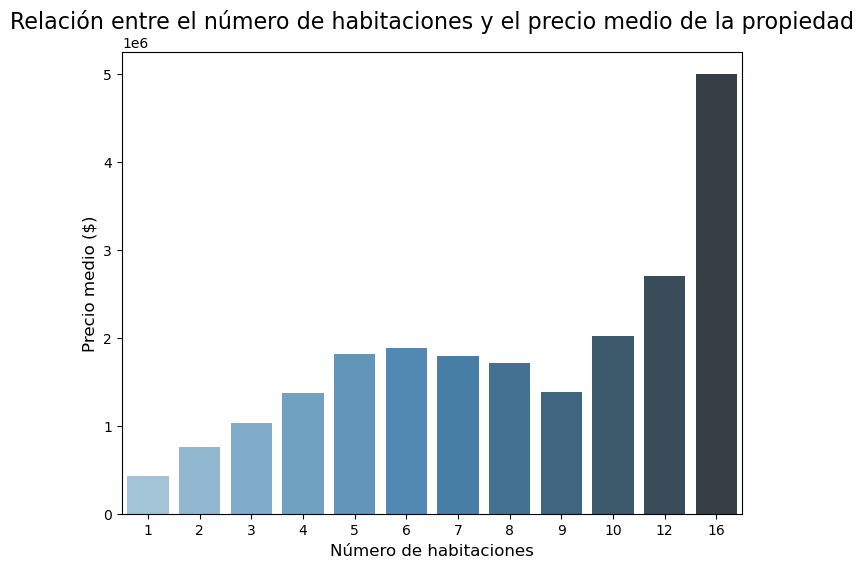

In [8]:
# Calcular el precio medio agrupado por el número de habitaciones
precio_medio_habitaciones = df_clean.groupby('Rooms')['Price'].mean().sort_index()

# Crear un gráfico de barras para mostrar la relación
plt.figure(figsize=(8, 6))
sns.barplot(x=precio_medio_habitaciones.index, y=precio_medio_habitaciones.values, palette='Blues_d')

# Añadir títulos y etiquetas
plt.title('Relación entre el número de habitaciones y el precio medio de la propiedad', fontsize=16)
plt.xlabel('Número de habitaciones', fontsize=12)
plt.ylabel('Precio medio ($)', fontsize=12)

# Mostrar el gráfico
plt.show()


5. Since the relationship between propeerty price and number of romms may not be linear, it is appropriate to use a non-parametric correlation coefficient such as Spearman's to determine the strenght of the relationship. Calculate the Spearman correlation coefficient to analyze the relationship between price and number of romms

In [9]:
from scipy.stats import spearmanr

# Calcular el coeficiente de correlación de Spearman entre 'Rooms' y 'Price'
coef_spearman, p_value = spearmanr(df_clean['Rooms'], df_clean['Price'])

# Mostrar el resultado
print(f"Coeficiente de correlación de Spearman: {coef_spearman:.4f}")
print(f"P-valor: {p_value:.4f}")


Coeficiente de correlación de Spearman: 0.5043
P-valor: 0.0000


6. Is there relationship between the distance from the Central Business Distric and the property price? use the scatter plot to visualize the relationship and calculate a correlation coefficient to determine the strength and direction of the correlation

Valores nulos en 'Distance': 0
Valores nulos en 'Price': 0


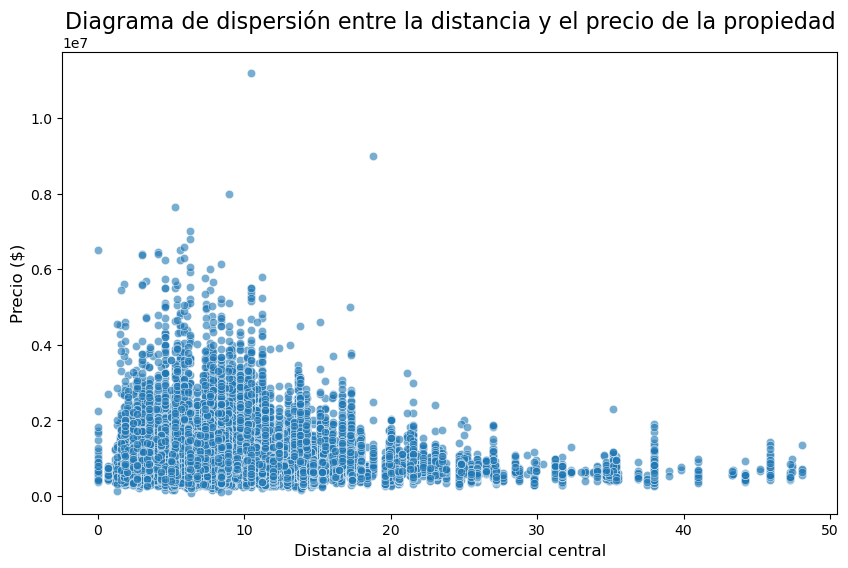

Coeficiente de correlación de Pearson: -0.2114
P-valor: 0.0000


In [11]:
# Importar bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Eliminar filas con valores nulos en las columnas 'Distance' y 'Price'
df_clean = df_clean.dropna(subset=['Distance', 'Price'])

# Verificar si aún hay valores nulos
print("Valores nulos en 'Distance':", df_clean['Distance'].isnull().sum())
print("Valores nulos en 'Price':", df_clean['Price'].isnull().sum())

# Crear un diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Distance', y='Price', alpha=0.6)

# Añadir título y etiquetas
plt.title('Diagrama de dispersión entre la distancia y el precio de la propiedad', fontsize=16)
plt.xlabel('Distancia al distrito comercial central', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)

# Mostrar el gráfico
plt.show()

# Calcular el coeficiente de correlación de Pearson
coef_pearson, p_value = pearsonr(df_clean['Distance'], df_clean['Price'])

# Mostrar el resultado
print(f"Coeficiente de correlación de Pearson: {coef_pearson:.4f}")
print(f"P-valor: {p_value:.4f}")


7.Is there a relationship between the propert size and the property price?

Valores nulos en 'Size': 0
Valores nulos en 'Price': 0


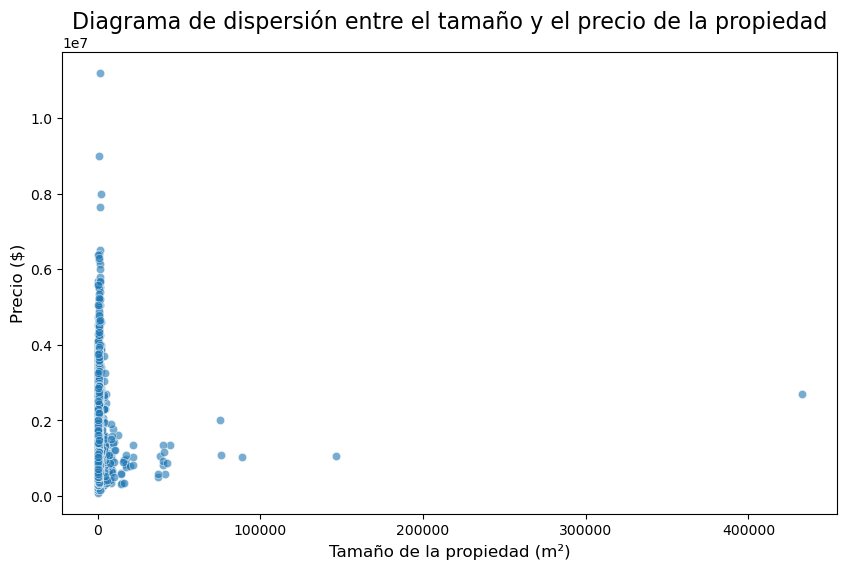

Coeficiente de correlación de Pearson: 0.0327
P-valor: 0.0000


In [13]:
# Eliminar filas con valores nulos en las columnas 'Landize' y 'Price'
df_clean = df_clean.dropna(subset=['Landsize', 'Price'])

# Verificar si aún hay valores nulos
print("Valores nulos en 'Landize':", df_clean['Landsize'].isnull().sum())
print("Valores nulos en 'Price':", df_clean['Price'].isnull().sum())

# Crear un diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Landsize', y='Price', alpha=0.6)

# Añadir título y etiquetas
plt.title('Diagrama de dispersión entre el tamaño y el precio de la propiedad', fontsize=16)
plt.xlabel('Tamaño de la propiedad (m²)', fontsize=12)
plt.ylabel('Precio ($)', fontsize=12)

# Mostrar el gráfico
plt.show()

# Calcular el coeficiente de correlación de Pearson
coef_pearson, p_value = pearsonr(df_clean['Landsize'], df_clean['Price'])

# Mostrar el resultado
print(f"Coeficiente de correlación de Pearson: {coef_pearson:.4f}")
print(f"P-valor: {p_value:.4f}")


8. 

C:\Users\Casa\AppData\Local\Temp\ipykernel_28208\1688196458.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Size_cat_q7'] = pd.qcut(df_clean['Landsize'], q=7, labels=False)
C:\Users\Casa\AppData\Local\Temp\ipykernel_28208\1688196458.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_price_by_size_q7, x='Size_cat_q7', y='Price', palette='viridis')


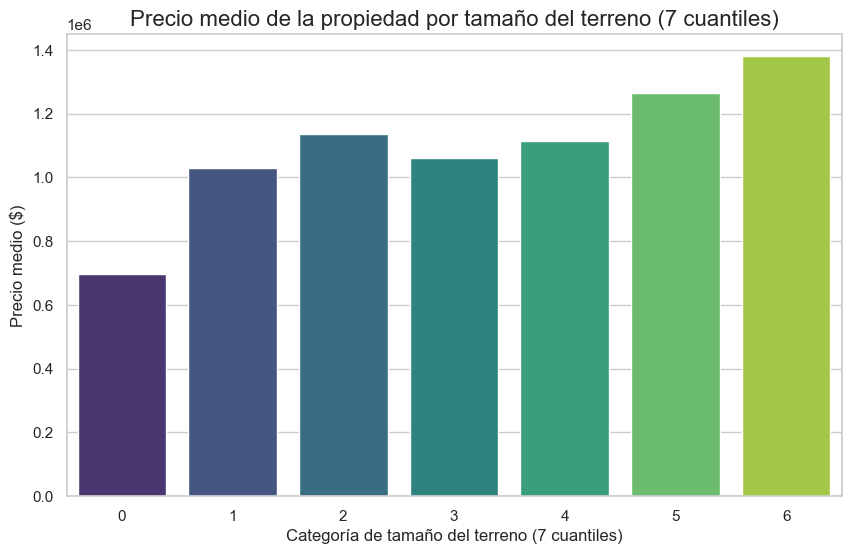

C:\Users\Casa\AppData\Local\Temp\ipykernel_28208\1688196458.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_price_by_size_q4, x='Size_cat_q4', y='Price', palette='viridis')


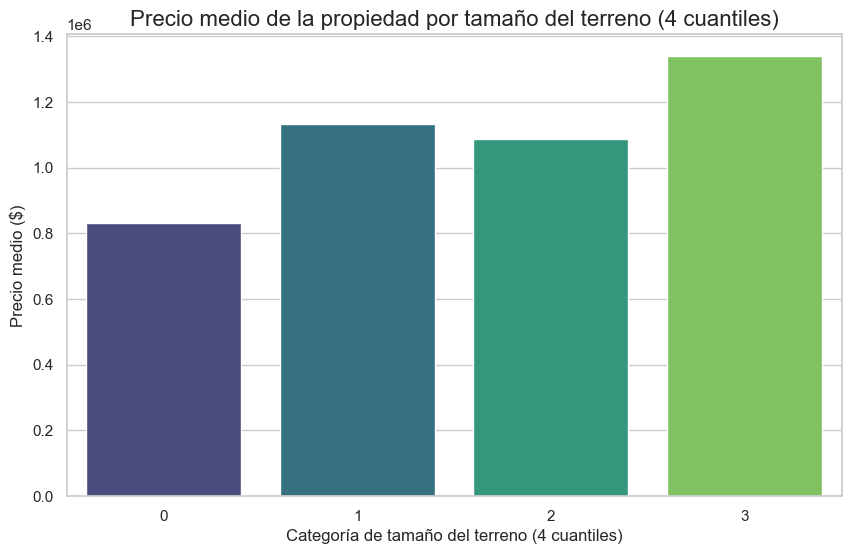

In [21]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Discretizar la variable del tamaño del terreno en 7 cuantiles
df_clean['Size_cat_q7'] = pd.qcut(df_clean['Landsize'], q=7, labels=False)

# Calcular el precio medio para cada categoría de tamaño
mean_price_by_size_q7 = df_clean.groupby('Size_cat_q7')['Price'].mean().reset_index()

# Crear un diagrama de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_price_by_size_q7, x='Size_cat_q7', y='Price', palette='viridis')

# Añadir título y etiquetas
plt.title('Precio medio de la propiedad por tamaño del terreno (7 cuantiles)', fontsize=16)
plt.xlabel('Categoría de tamaño del terreno (7 cuantiles)', fontsize=12)
plt.ylabel('Precio medio ($)', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=0)
plt.show()

# Repetir el proceso con 4 cuantiles
df_clean['Size_cat_q4'] = pd.qcut(df_clean['Landsize'], q=4, labels=False)
mean_price_by_size_q4 = df_clean.groupby('Size_cat_q4')['Price'].mean().reset_index()

# Crear un diagrama de barras para 4 cuantiles
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_price_by_size_q4, x='Size_cat_q4', y='Price', palette='viridis')

# Añadir título y etiquetas
plt.title('Precio medio de la propiedad por tamaño del terreno (4 cuantiles)', fontsize=16)
plt.xlabel('Categoría de tamaño del terreno (4 cuantiles)', fontsize=12)
plt.ylabel('Precio medio ($)', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=0)
plt.show()


9. Does the dataset contain any properties that are proced significantly above or below the average? to investigate, create a box plot to detect potential outliers, and use tukey´s method with a 1.5 threshold to create a new dataframe without these outliers. what percentage of propierties are identified as outliers using tukey's method

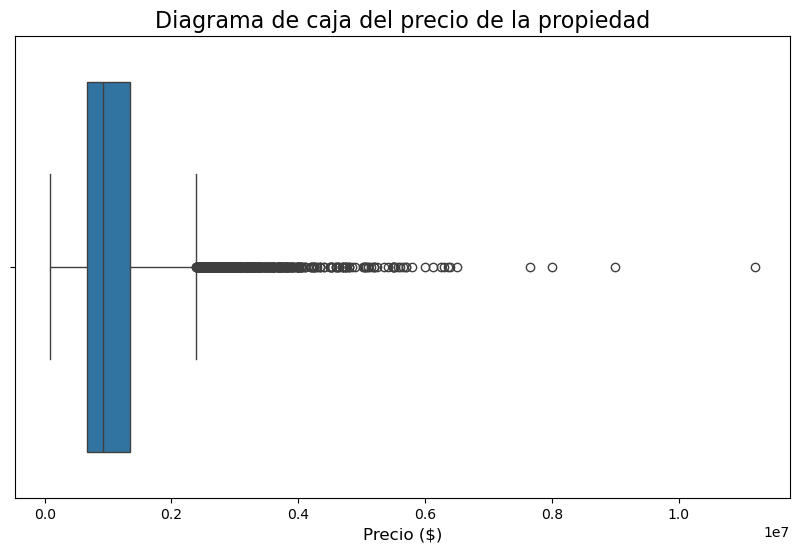

Número total de propiedades: 17982
Número de valores atípicos: 807
Porcentaje de propiedades identificadas como valores atípicos: 4.49%
       Suburb           Address  Rooms Type    Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000     VB  Nelson   

        Date  Distance  Postcode  ...  Landsize  BuildingArea  YearBuilt  \
0  3/12/2016       2.5    3067.0  ...     202.0           NaN        NaN   
1  4/02/2016       2.5    3067.0  ...     156.0          79.0     1900.0   
2  4/03/2017       2.5    3067.0  ...     134.0         150.0     1900.0   
3  4/03/2017       2.5    3067.0  ...      94.0           NaN        NaN   
4  4/06/2016       2.5    3067.0  ...     120.0         1

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un diagrama de caja para detectar valores atípicos en 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['Price'])
plt.title('Diagrama de caja del precio de la propiedad', fontsize=16)
plt.xlabel('Precio ($)', fontsize=12)
plt.show()

# Aplicar el método de Tukey para identificar valores atípicos
Q1 = df_clean['Price'].quantile(0.25)  # Primer cuartil
Q3 = df_clean['Price'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# Determinar límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar valores atípicos
outliers = df_clean[(df_clean['Price'] < lower_bound) | (df_clean['Price'] > upper_bound)]
non_outliers = df_clean[(df_clean['Price'] >= lower_bound) & (df_clean['Price'] <= upper_bound)]

# Calcular el porcentaje de propiedades identificadas como valores atípicos
percentage_outliers = (len(outliers) / len(df_clean)) * 100

# Mostrar resultados
print(f"Número total de propiedades: {len(df_clean)}")
print(f"Número de valores atípicos: {len(outliers)}")
print(f"Porcentaje de propiedades identificadas como valores atípicos: {percentage_outliers:.2f}%")

# Crear un nuevo marco de datos sin valores atípicos
df_no_outliers = non_outliers.reset_index(drop=True)

# Mostrar el nuevo DataFrame sin valores atípicos
print(df_no_outliers.head())


10. How is the property price distribution? Create a QQ plot to compare the distribution of property prices to a normal distribution visually, and calculate the skew and kurtosis to get a better understandig of the shape of the distribution analytically

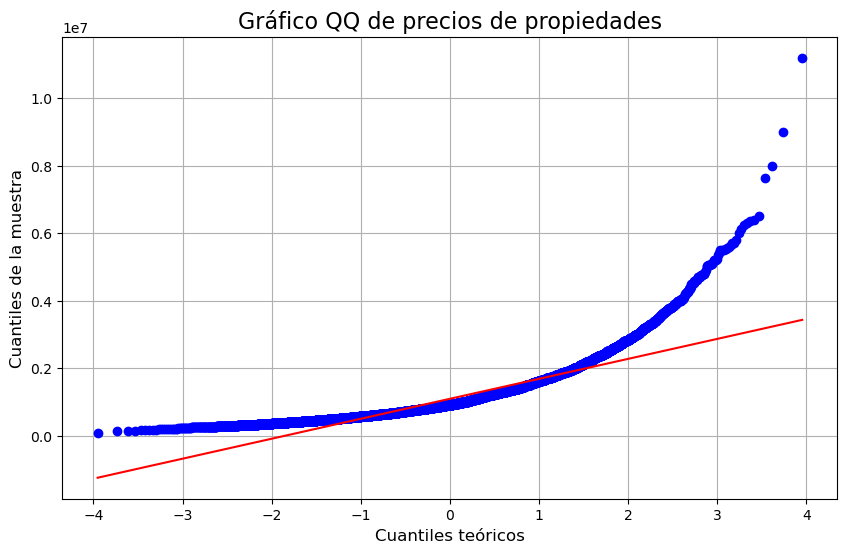

Asimetría: 2.4370
Curtosis: 12.5074


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Crear un gráfico QQ para comparar la distribución de precios con una distribución normal
plt.figure(figsize=(10, 6))
stats.probplot(df_clean['Price'], dist="norm", plot=plt)
plt.title('Gráfico QQ de precios de propiedades', fontsize=16)
plt.xlabel('Cuantiles teóricos', fontsize=12)
plt.ylabel('Cuantiles de la muestra', fontsize=12)
plt.grid()
plt.show()

# Calcular asimetría y curtosis
skewness = df_clean['Price'].skew()
kurtosis = df_clean['Price'].kurtosis()

# Mostrar resultados
print(f"Asimetría: {skewness:.4f}")
print(f"Curtosis: {kurtosis:.4f}")


11.what is the outcome of performng a normality test, such as the Kolmogorov-Smirnov test, on the distribution of property prices? Specifically, what posible conclusions can be drawn fro the test results regarding the similarity of the distribution to a normal distribution?

In [18]:
import numpy as np
from scipy.stats import kstest

# Realizar la prueba de Kolmogorov-Smirnov
# Se utiliza la distribución normal con la media y la desviación estándar de los precios
mean_price = np.mean(df_clean['Price'])
std_price = np.std(df_clean['Price'])

# Obtener la estadística de K-S y el p-valor
ks_statistic, p_value = kstest(df_clean['Price'], 'norm', args=(mean_price, std_price))

# Mostrar los resultados
print(f"Estadística de Kolmogorov-Smirnov: {ks_statistic:.4f}")
print(f"P-valor: {p_value:.4f}")


Estadística de Kolmogorov-Smirnov: 0.1273
P-valor: 0.0000


12.

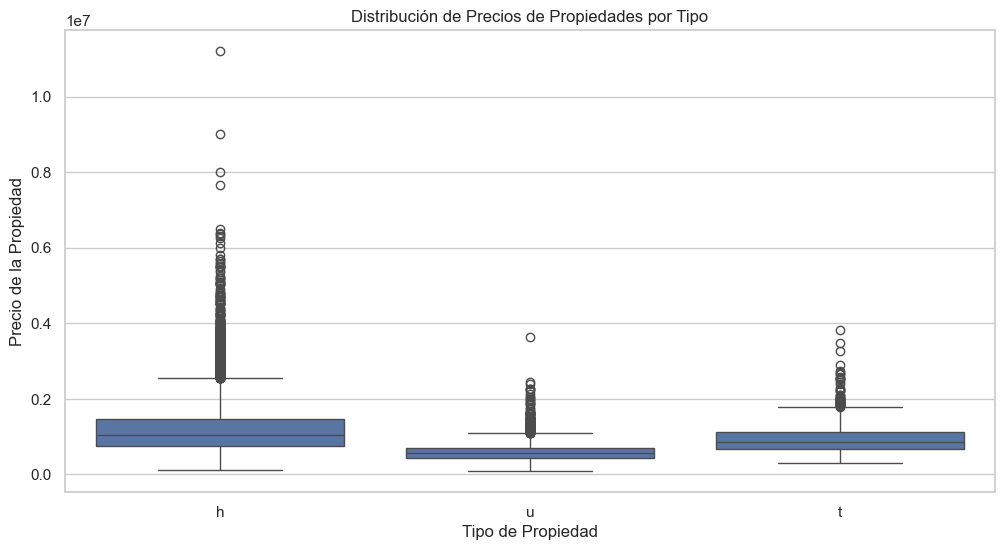

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Price', data=df_clean)

# Configurar los títulos y etiquetas
plt.title('Distribución de Precios de Propiedades por Tipo')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio de la Propiedad')
plt.xticks(rotation=0)
plt.show()


13.

In [22]:
# Agrupar los datos por 'Region' y calcular el precio medio
mean_price_by_region = df_clean.groupby('Regionname')['Price'].mean().reset_index()

# Obtener la región con el precio medio más alto y más bajo
highest_price_region = mean_price_by_region.loc[mean_price_by_region['Price'].idxmax()]
lowest_price_region = mean_price_by_region.loc[mean_price_by_region['Price'].idxmin()]

# Mostrar los resultados
print(f"Región con el precio medio más alto: {highest_price_region['Regionname']} - Precio medio: {highest_price_region['Price']:.2f}")
print(f"Región con el precio medio más bajo: {lowest_price_region['Regionname']} - Precio medio: {lowest_price_region['Price']:.2f}")


Región con el precio medio más alto: Southern Metropolitan - Precio medio: 1466252.84
Región con el precio medio más bajo: Western Victoria - Precio medio: 440936.57


14.

In [23]:
import pandas as pd
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Categorizar el precio en grupos
price_bins = pd.cut(df_clean['Price'], bins=5)  # Dividir en 5 categorías
df_clean['Price_Category'] = price_bins

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_clean['Regionname'], df_clean['Price_Category'])

# Realizar la prueba de chi cuadrado
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

# Mostrar resultados
print(f"Estadística Chi Cuadrado: {chi2_statistic:.4f}")
print(f"P-valor: {p_value:.4f}")

# Coeficiente V de Cramer
n = contingency_table.sum().sum()  # Total de observaciones
phi2 = chi2_statistic / n
r, k = contingency_table.shape  # Número de filas y columnas
v_cramer = np.sqrt(phi2 / min(k - 1, r - 1))

print(f"Coeficiente V de Cramer: {v_cramer:.4f}")


Estadística Chi Cuadrado: 1200.9554
P-valor: 0.0000
Coeficiente V de Cramer: 0.1292


15

In [29]:
# Asegúrate de que la columna de fecha está en el formato de fecha correcto
df_no_outliers['Date'] = pd.to_datetime(df_no_outliers['Date'], format='%d/%m/%Y', errors='coerce')

# Extraer el año de la columna de fecha
df_no_outliers['Year'] = df_no_outliers['Date'].dt.year

# Calcular el precio medio por año
mean_price_by_year = df_no_outliers.groupby('Year')['Price'].mean().reset_index()

# Obtener el primer y último año
first_year = mean_price_by_year['Year'].min()
last_year = mean_price_by_year['Year'].max()

# Obtener los precios medios del primer y último año
first_year_price = mean_price_by_year.loc[mean_price_by_year['Year'] == first_year, 'Price'].values[0]
last_year_price = mean_price_by_year.loc[mean_price_by_year['Year'] == last_year, 'Price'].values[0]

# Calcular el aumento/disminución porcentual
percentage_change = ((last_year_price - first_year_price) / first_year_price) * 100

# Mostrar los resultados
print(f"Precio medio en {first_year}: {first_year_price:.2f}")
print(f"Precio medio en {last_year}: {last_year_price:.2f}")
print(f"Aumento/Disminución porcentual: {percentage_change:.2f}%")



Precio medio en 2016: 977760.11
Precio medio en 2018: 1045067.11
Aumento/Disminución porcentual: 6.88%


16

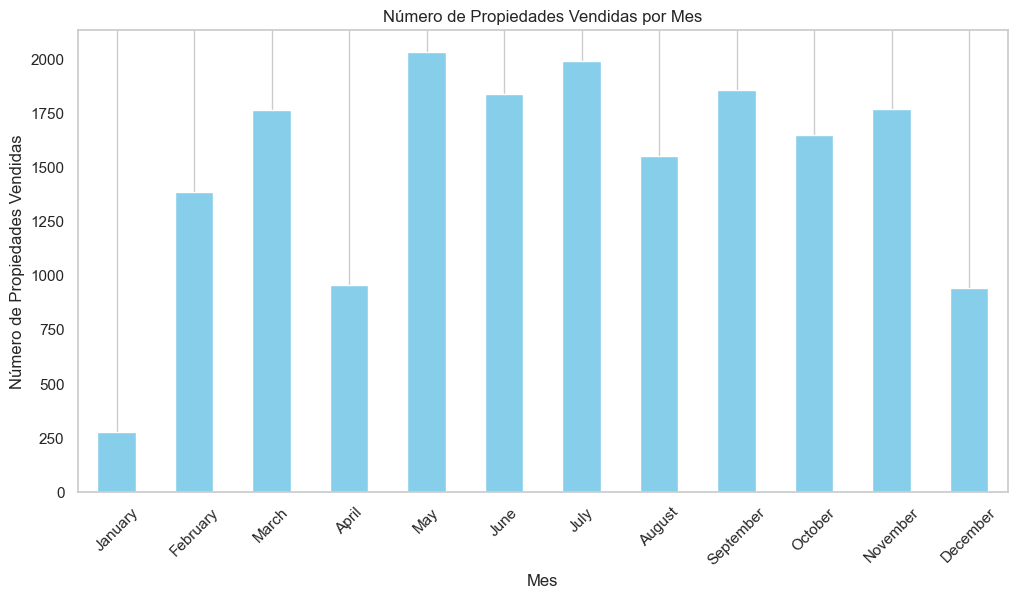

El mes con más ventas es: May con 2031 ventas.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que la columna de fecha está en el formato de fecha correcto
df_no_outliers['Date'] = pd.to_datetime(df_no_outliers['Date'], format='%d/%m/%Y', errors='coerce')

# Extraer el mes de la columna de fecha
df_no_outliers['Month'] = df_no_outliers['Date'].dt.month_name()  # O usa .dt.month para obtener el número del mes

# Contar el número de ventas por mes
sales_per_month = df_clean['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Crear un gráfico de barras para visualizar el número de ventas por mes
plt.figure(figsize=(12, 6))
sales_per_month.plot(kind='bar', color='skyblue')
plt.title('Número de Propiedades Vendidas por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Propiedades Vendidas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Mostrar el mes con más ventas
max_sales_month = sales_per_month.idxmax()
max_sales_value = sales_per_month.max()

print(f"El mes con más ventas es: {max_sales_month} con {max_sales_value} ventas.")
